In [12]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-01-14 15:04:54,176: Default instance: ibm-q/open/main


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

import networkx as nx

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit_optimization.converters import QuadraticProgramToQubo

from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

from itertools import permutations #per brutal approches TSP

In [14]:
#draw a graph coloring the nodes

#funzione per disegnare un grafo con nodi colorati
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

#funzione per disegnare un cammino su un grafo
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)

# TIME and FEASIBILITY

### COBYLA

Several runs of the SamplingVQE  are conducted with the optimizer set to COBYLA (maxiter=300), while varying the depth of twolocal reps=1, 2, 3, 4, and the control gate (CZ or CX). Each combination is executed on 100 different random graphs with 3 nodes to compute the average time and feasibility solution attainment

In [15]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    ###EXACT SOLUTION
    ###Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
    #ee = NumPyMinimumEigensolver()
    #exact_result.append(ee.compute_minimum_eigenvalue(qubitOp))
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=1, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
  

In [16]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

6.63638162612915
4.515286684036255
5.4463987326622005


100

In [17]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
    

In [18]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

7.473645210266113
6.744727611541748
7.056289758682251


99

In [19]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [20]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

8.04468297958374
7.2698633670806885
7.573961346149445


98

In [21]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=4, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [22]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

8.481897830963135
8.000140905380249
8.197649405002593


100

In [23]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=1, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [24]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

6.6846513748168945
5.072940826416016
5.976113767623901


97

In [25]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=2, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [26]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

7.45468544960022
6.977764844894409
7.162758402824402


99

In [27]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=3, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [28]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

8.088916063308716
7.527175426483154
7.680456056594848


96

### SPSA

Several runs of the VQE sampling are conducted with the optimizer set to SPSA (maxiter=300), while varying the depth of twolocal reps=1, 2, 3, 4. Each combination is executed on 100 different random graphs with 3 nodes to compute the average time and feasibility solution attainment

In [29]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=1, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [30]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

14.29700493812561
13.404052257537842
13.789933452606201


85

In [31]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [32]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

15.427778244018555
14.353211402893066
14.822652716636657


87

In [33]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [34]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

16.68466544151306
15.612700462341309
16.04867837905884


89

In [35]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=1, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [36]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

14.526697635650635
13.62152361869812
14.051894328594209


82

In [37]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=2, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [38]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

15.476263523101807
14.654154777526855
15.068197073936462


91

In [39]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #ansatz
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cx", reps=3, entanglement="linear")
    #optimizer
    optimizer = SPSA(maxiter=300)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [40]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

16.620526552200317
15.368333101272583
15.953186922073364


81

### TOLLERANCE

In [41]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300,tol=0.1)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [42]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

7.771281719207764
6.165342807769775
7.269524827003479


100

In [43]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300,tol=0.3)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [44]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

7.314487934112549
3.7192745208740234
5.516310524940491


99

In [45]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
    #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    ansatz= TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="linear")
    #optimizer
    optimizer = COBYLA(maxiter=300,tol=0.5)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp))
        #resut
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)

In [46]:
print(max(time))
print(min(time))
print(sum(time)/len(time))
#print(max(energy))
#print(min(energy))
#print(sum(energy)/len(energy))
sum(1 for n in feasible if n == True)

6.316447496414185
2.3798770904541016
4.32406194448471


97

# TOLLERANCE and FEASIBILITY


Now we perform the sampling VQE on the same 4-node graph with COBYLA (maxiter=300), adjusting tolerance values to reduce execution time while maintaining the feasibility percentage

distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


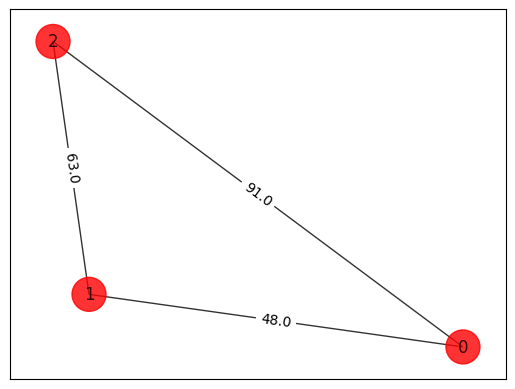

In [48]:
# Generating a graph of 3 nodes
n = 3
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123) 
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors_6 = ["r" for node in tsp.graph.nodes]
pos_3 = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors_6, pos_3)

In [49]:
#define the Ising model
qp_tsp = tsp.to_quadratic_program()
qp2qubo_tsp = QuadraticProgramToQubo()
qubo_tsp = qp2qubo_tsp.convert(qp_tsp)
qubitOp_tsp, offset = qubo_tsp.to_ising()

In [50]:
ee = NumPyMinimumEigensolver()
result=ee.compute_minimum_eigenvalue(qubitOp_tsp)
print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qp_tsp.is_feasible(x))
z= tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))

energy: -7379.0
tsp objective: 202.0
feasible: True
solution: [0, 1, 2]
solution objective: 202.0


In [51]:
algorithm_globals.random_seed = 123
seed = 10598

In [52]:
counts=[]
params=[]
values=[]
mddict=[]
def store_intermediate_result(count, parameters, value, step):
    counts.append(count)
    params.append(parameters)
    values.append(value)
    mddict.append(step)

In [53]:
result_clb=[]
time=[]
energy=[]
for i in range (1,101,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=0.5)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

4.470832586288452
1.9015147686004639
2.998370690345764
-4704.63214595649
-7239.406733948992
-6788.299936019965


9

In [54]:
result_clb=[]
time=[]
energy=[]
for i in range (1,100,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=0.35)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

5.7962327003479
1.7557342052459717
3.4725711080763073
-4833.372824425202
-7315.5065619282095
-7066.941646384569


4

In [55]:
result_clb=[]
time=[]
energy=[]
for i in range (1,100,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=0.8)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

3.9512150287628174
0.9691543579101562
2.2588644605694395
-4154.995645748554
-7028.710894380623
-5949.12906076843


17

In [56]:
result_clb=[]
time=[]
energy=[]
for i in range (1,100,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=0.2)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

7.23901104927063
3.137084484100342
4.494517755026769
-4858.526124289117
-7353.154906083859
-7231.891106405146


3

In [57]:
result_clb=[]
time=[]
energy=[]
for i in range (1,100,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=0.1)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

7.310377359390259
4.343810558319092
5.649076784499968
-5001.402783456308
-7370.8579926305465
-7287.46468394155


0

In [58]:
result_clb=[]
time=[]
energy=[]
for i in range (1,100,1):
    counts=[]
    params=[]
    values=[]
    mddict=[]
    optimizer = COBYLA(maxiter=300, tol=1)
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result_clb. append(vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp))
    energy.append(result_clb[i-1].eigenvalue.real)
    time.append(result_clb[i-1].optimizer_time)
print(max(time))
print(min(time))
print(sum(time)/len(time))
print(max(energy))
print(min(energy))
print(sum(energy)/len(energy))
sum(1 for n in energy if n > -5000)

2.979959011077881
1.1245994567871094
1.8272353904415863
-3998.0151035779913
-6895.7303887049575
-5537.935440350253


29

# PLOT


We are studying the convergence of different depths of the TwoLocal circuit, with epsilon values of 1, 2, 3, both for Cz and Cx gates. Additionally, we are comparing the effectiveness of the two different classical optimizers used in this analysis

1
energy: -7378.999328962683
time: 11.752514600753784
feasible: True
solution: [2, 0, 1]
solution objective: 202.0
2
energy: -7376.4661386630905
time: 15.725724220275879
feasible: True
solution: [1, 0, 2]
solution objective: 202.0
3
energy: -7364.818683475441
time: 14.721195220947266
feasible: True
solution: [2, 0, 1]
solution objective: 202.0
1
energy: -7368.303659615423
time: 28.17366623878479
feasible: True
solution: [2, 1, 0]
solution objective: 202.0
2
energy: -7351.738933168748
time: 28.43384552001953
feasible: True
solution: [1, 0, 2]
solution objective: 202.0
3
energy: -7238.130782911616
time: 32.29147291183472
feasible: True
solution: [2, 0, 1]
solution objective: 202.0


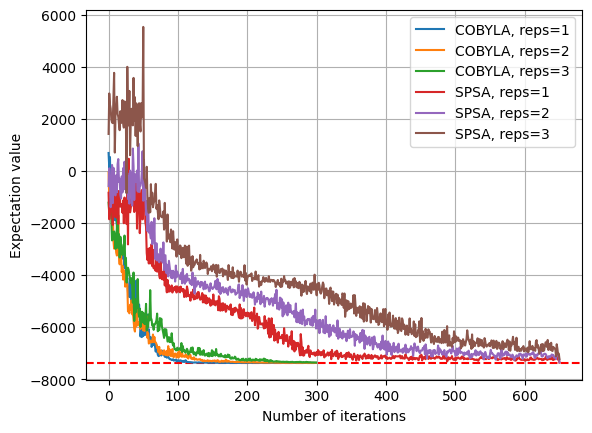

In [22]:
plt.axhline(y=-7379, color='r', linestyle='--')
counts=[]
params=[]
values=[]
mddict=[]
optimizer = COBYLA(maxiter=300)
for i in range (1,4,1):
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=i, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result=vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp)
    print(i)
    print("energy:", result.eigenvalue.real)
    print("time:", result.optimizer_time)
    x= tsp.sample_most_likely(result.eigenstate)
    print("feasible:", qubo_tsp.is_feasible(x))
    z = tsp.interpret(x)
    print("solution:", z)
    print("solution objective:", tsp.tsp_value(z, adj_matrix))
    pylab.plot(values, label= f'COBYLA, reps={i}')
    counts=[]
    params=[]
    values=[]
    mddict=[]
optimizer = SPSA(maxiter=300)
for i in range (1,4,1):
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cz", reps=i, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result=vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp)
    print(i)
    print("energy:", result.eigenvalue.real)
    print("time:", result.optimizer_time)
    x= tsp.sample_most_likely(result.eigenstate)
    print("feasible:", qubo_tsp.is_feasible(x))
    z = tsp.interpret(x)
    print("solution:", z)
    print("solution objective:", tsp.tsp_value(z, adj_matrix))
    pylab.plot(values, label= f'SPSA, reps={i}')
    counts=[]
    params=[]
    values=[]
    mddict=[]
pylab.grid(True)
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Expectation value')
# Mostra il grafico
pylab.show()


1
energy: -7377.316401881209
time: 10.634467363357544
feasible: True
solution: [2, 1, 0]
solution objective: 202.0
2
energy: -7372.792600867249
time: 15.681817770004272
feasible: True
solution: [1, 2, 0]
solution objective: 202.0
3
energy: -7348.938834653172
time: 17.467297077178955
feasible: True
solution: [0, 2, 1]
solution objective: 202.0
1
energy: -7377.584231750142
time: 26.232789754867554
feasible: True
solution: [0, 2, 1]
solution objective: 202.0
2
energy: -7364.231559159532
time: 30.483214139938354
feasible: True
solution: [1, 0, 2]
solution objective: 202.0
3
energy: -6685.074565639122
time: 31.28300142288208
feasible: True
solution: [2, 0, 1]
solution objective: 202.0


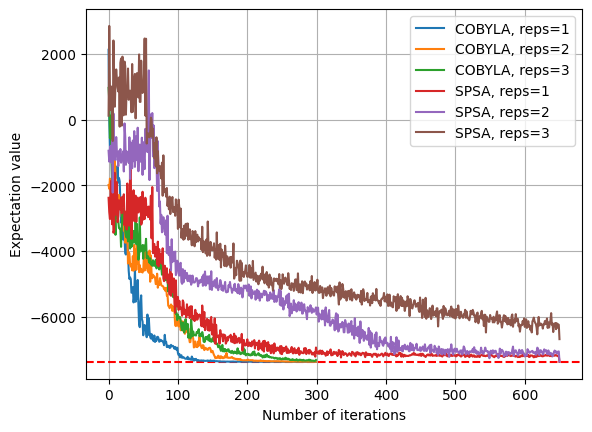

In [23]:
plt.axhline(y=-7379, color='r', linestyle='--')
counts=[]
params=[]
values=[]
mddict=[]
optimizer = COBYLA(maxiter=300)
for i in range (1,4,1):
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cx", reps=i, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result=vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp)
    print(i)
    print("energy:", result.eigenvalue.real)
    print("time:", result.optimizer_time)
    x= tsp.sample_most_likely(result.eigenstate)
    print("feasible:", qubo_tsp.is_feasible(x))
    z = tsp.interpret(x)
    print("solution:", z)
    print("solution objective:", tsp.tsp_value(z, adj_matrix))
    pylab.plot(values, label= f'COBYLA, reps={i}')
    counts=[]
    params=[]
    values=[]
    mddict=[]
optimizer = SPSA(maxiter=300)
for i in range (1,4,1):
    ry_clb = TwoLocal(qubitOp_tsp.num_qubits, "ry", "cx", reps=i, entanglement="linear")
    vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=ry_clb, optimizer=optimizer, callback=store_intermediate_result)
    # run SamplingVQE 
    result=vqe_clb.compute_minimum_eigenvalue(qubitOp_tsp)
    print(i)
    print("energy:", result.eigenvalue.real)
    print("time:", result.optimizer_time)
    x= tsp.sample_most_likely(result.eigenstate)
    print("feasible:", qubo_tsp.is_feasible(x))
    z = tsp.interpret(x)
    print("solution:", z)
    print("solution objective:", tsp.tsp_value(z, adj_matrix))
    pylab.plot(values, label= f'SPSA, reps={i}')
    counts=[]
    params=[]
    values=[]
    mddict=[]
pylab.grid(True)
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Expectation value')
# Mostra il grafico
pylab.show()

# Proposed 1

We construct the proposed parametric circuit "Proposed 1" and analyze its execution time and convergence

In [62]:
#Anstatz 1
theta = ParameterVector('theta', n**2)
ansatz = QuantumCircuit(n**2)
for i in range (0,n**2, n):
    ansatz.x(i)
    for j in range(i+1,i+n,1):
        ansatz.ry(theta[j-1], j)
        ansatz.cz(j-1,j)
        ansatz.ry(-theta[j-1], j)
    for j in range(i+1,i+n,1):
        ansatz.cx(j,j-1)

In [66]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
   #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #optimizer
    optimizer = COBYLA(maxiter=50)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
print(max(time))
print(min(time))
print(sum(time)/len(time))
sum(1 for n in feasible if n == True)

0.35082173347473145
0.2561800479888916
0.27655231952667236


100

In [ ]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
   #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #optimizer
    optimizer = SPSA(maxiter=50)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
print(max(time))
print(min(time))
print(sum(time)/len(time))
sum(1 for n in feasible if n == True)

0.9302597045898438
0.6106064319610596
0.660065586566925


100

In [68]:
qc2=ansatz

# Proposed 2

In [72]:
# create the Ansatz
def W_circuit(QC, n, q1n, theta):
    QC.x(q1n)
    #QC.barrier(range(q1n,q1n+n))
    for j in range(q1n+1,q1n+n,1):
        QC.ry(theta[j-1], j)
        QC.cz(j-1,j)
        QC.ry(-theta[j-1], j)
        #QC.barrier(range(q1n,q1n+n))
    for j in range(q1n+1,q1n+n,1):
        QC.cx(j,j-1)

def base_circuit(QC, n, theta):
    theta1 = ParameterVector('theta2', 1)
    QC.x(0)
    #QC.barrier(range(0,n-1))
    QC.ry(theta[1], 1)
    QC.cz(0,1)
    QC.ry(-theta[1], 1)
    QC.cx(1,0)
    QC.cx(1,n)
    QC.cx(0,n+1)


In [73]:
qc = QuantumCircuit(n**2)
phi=ParameterVector('phi', n**2)
base_circuit(qc,n, phi)
for i in range(3,n+1,1):
    W_circuit(qc, i, n*(i-1), phi)
    #qc.barrier()
for v in range(1,n,1):
    for p in range(1,n,1):
        qc.cswap(n*(n-1)+v-1,n*(p-1)+n-1,n*(p-1)+v-1)
ansatz=qc
#qc.draw('mpl',plot_barriers=False)

In [75]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
   #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #optimizer
    optimizer = COBYLA(maxiter=50)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
print(max(time))
print(min(time))
print(sum(time)/len(time))
sum(1 for n in feasible if n == True)

0.19800925254821777
0.1285862922668457
0.15064382791519165


100

In [76]:
exact_result=[]
result=[]
energy=[]  
time=[]
feasible=[]
for i in range (0,100,1):
    #generate graph:
    n = 3
    num_qubits = n**2
    tsp = Tsp.create_random_instance(n) 
    adj_matrix = nx.to_numpy_array(tsp.graph)
   #define ising model 
    qp = tsp.to_quadratic_program()
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    #optimizer
    optimizer = SPSA(maxiter=50)
    vqe= SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer) #define the SamplingVqe
    # run SamplingVQE
    result.append(vqe.compute_minimum_eigenvalue(qubitOp)) 
    energy.append(result[i].eigenvalue.real)
    time.append(result[i].optimizer_time)
    x= tsp.sample_most_likely(result[i].eigenstate)
    feasible.append(qp.is_feasible(x))
    x = tsp.sample_most_likely(result[i].eigenstate)
    z= tsp.interpret(x)
print(max(time))
print(min(time))
print(sum(time)/len(time))
sum(1 for n in feasible if n == True)

0.6838948726654053
0.41411566734313965
0.45036294460296633


100

In [90]:
qc=ansatz

# CONVERGENCE

In [11]:
counts=[]
params=[]
values=[]
mddict=[]
def store_intermediate_result(count, parameters, value, step):
    counts.append(count)
    params.append(parameters)
    values.append(value)
    mddict.append(step)

distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


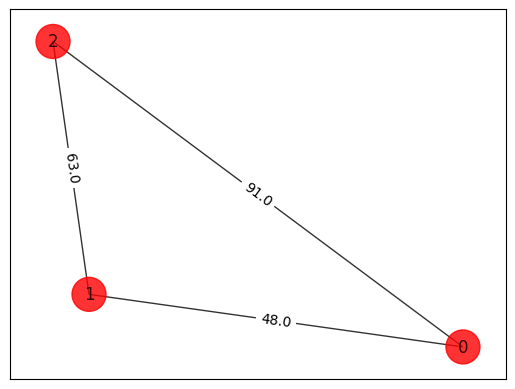

In [12]:
n = 3
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123) 
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors_6 = ["r" for node in tsp.graph.nodes]
pos_3 = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors_6, pos_3)

In [13]:
qp = tsp.to_quadratic_program()
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

In [33]:
counts=[]
params=[]
values=[]
mddict=[]
optimizer = COBYLA(maxiter=50)
vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=qc2, optimizer=optimizer, callback=store_intermediate_result)
# run SamplingVQE 
result=vqe_clb.compute_minimum_eigenvalue(qubitOp)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x= tsp.sample_most_likely(result.eigenstate)
print("feasible:", qp.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
values1=values
#

energy: -7378.794262392952
time: 0.30070018768310547
feasible: True
solution: [2, 0, 1]
solution objective: 202.0


In [34]:
counts=[]
params=[]
values=[]
mddict=[]
optimizer = SPSA(maxiter=50)
vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=qc2, optimizer=optimizer, callback=store_intermediate_result)
# run SamplingVQE 
result=vqe_clb.compute_minimum_eigenvalue(qubitOp)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x= tsp.sample_most_likely(result.eigenstate)
print("feasible:", qp.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
values2=values

energy: -7350.225865178284
time: 0.6560657024383545
feasible: True
solution: [2, 0, 1]
solution objective: 202.0


In [36]:
counts=[]
params=[]
values=[]
mddict=[]
optimizer = COBYLA(maxiter=50)
vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=qc, optimizer=optimizer, callback=store_intermediate_result)
# run SamplingVQE 
result=vqe_clb.compute_minimum_eigenvalue(qubitOp)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x= tsp.sample_most_likely(result.eigenstate)
print("feasible:", qp.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
values3=values

energy: -7379.0
time: 0.2830066680908203
feasible: True
solution: [0, 2, 1]
solution objective: 202.0


In [43]:
counts=[]
params=[]
values=[]
mddict=[]
optimizer = SPSA(maxiter=50)
vqe_clb = SamplingVQE(sampler=Sampler(), ansatz=qc, optimizer=optimizer, callback=store_intermediate_result)
# run SamplingVQE 
result=vqe_clb.compute_minimum_eigenvalue(qubitOp)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x= tsp.sample_most_likely(result.eigenstate)
print("feasible:", qp.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
values4=values

energy: -7378.999999999998
time: 0.4075441360473633
feasible: True
solution: [2, 1, 0]
solution objective: 202.0


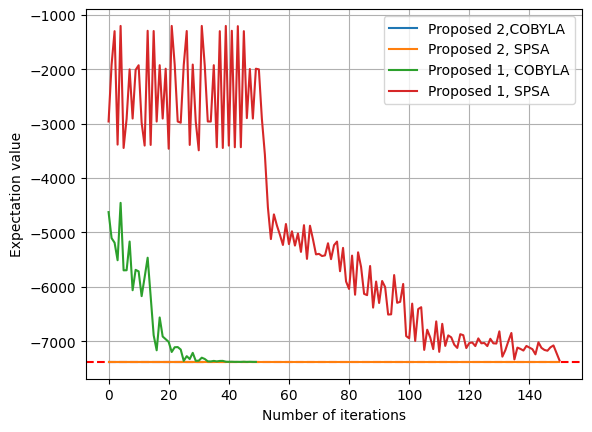

In [44]:
plt.axhline(y=-7379, color='r', linestyle='--')


pylab.plot(values3, label= f'Proposed 2,COBYLA')
pylab.plot(values4, label= f'Proposed 2, SPSA')
pylab.plot(values1, label= f'Proposed 1, COBYLA')
pylab.plot(values2, label= f'Proposed 1, SPSA')


pylab.grid(True)
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Expectation value')
# Mostra il grafico
pylab.show()